In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read the data

In [5]:
movies = pd.read_csv('../datasets/Movie.csv')

In [6]:
movies

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5
...,...,...,...
8987,7087,GoldenEye (1995),3.0
8988,7088,GoldenEye (1995),1.0
8989,7105,GoldenEye (1995),2.0
8990,7113,GoldenEye (1995),3.0


In [7]:
## Unique Movies
movies.movie.unique()

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)',
       'Heat (1995)', 'Sabrina (1995)', 'Tom and Huck (1995)',
       'Sudden Death (1995)', 'GoldenEye (1995)'], dtype=object)

In [8]:
movies.movie.nunique()

10

In [9]:
## Unique Users
movies.userId.nunique()

4081

#### What ratings are users giving?

In [11]:
ratings = movies.rating.value_counts()
ratings

3.0    2736
4.0    2660
5.0    1394
3.5     679
2.0     542
4.5     374
2.5     277
1.0     212
1.5      61
0.5      57
Name: rating, dtype: int64

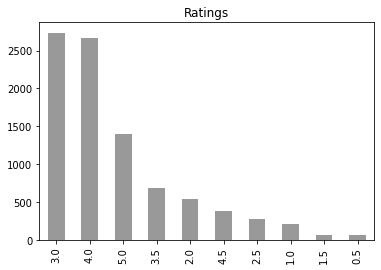

In [14]:
ratings.plot(kind='bar', color='black', alpha=0.4, title='Ratings')
plt.show()

#### What is the average rating for each movie?

In [20]:
avg_ratings = movies.groupby('movie').agg('mean')['rating'].sort_values(ascending=False)
avg_ratings

movie
Toy Story (1995)                      3.959323
Heat (1995)                           3.836508
GoldenEye (1995)                      3.427003
Sabrina (1995)                        3.381429
Tom and Huck (1995)                   3.352564
Jumanji (1995)                        3.268398
Grumpier Old Men (1995)               3.186861
Father of the Bride Part II (1995)    3.143836
Sudden Death (1995)                   3.017327
Waiting to Exhale (1995)              3.000000
Name: rating, dtype: float64

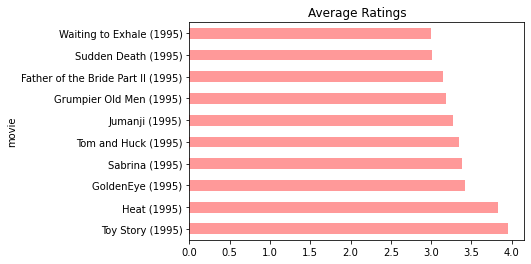

In [27]:
avg_ratings.plot(kind='barh', color='red', alpha=0.4, title='Average Ratings')
plt.show()

#### How many users have rated each movie?

In [26]:
popular_movies = movies.groupby('movie').agg('count')['rating'].sort_values(ascending=False)
popular_movies

movie
Toy Story (1995)                      2569
GoldenEye (1995)                      1548
Heat (1995)                           1260
Jumanji (1995)                        1155
Sabrina (1995)                         700
Grumpier Old Men (1995)                685
Father of the Bride Part II (1995)     657
Sudden Death (1995)                    202
Waiting to Exhale (1995)               138
Tom and Huck (1995)                     78
Name: rating, dtype: int64

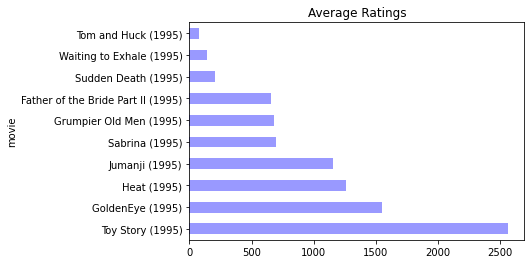

In [28]:
popular_movies.plot(kind='barh', color='blue', alpha=0.4, title='Average Ratings')
plt.show()

### User Movie Matrix

In [29]:
user_movie_matrix = pd.pivot_table(data=movies, columns='movie', index='userId', values='rating')
user_movie_matrix

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
4,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7116,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
7117,NaN,3.0,4.0,5.0,NaN,3.0,1.0,NaN,4.0,NaN


In [31]:
user_movie_matrix.fillna(0, inplace=True)

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
user_sim_matrix = cosine_similarity(user_movie_matrix)
user_sim_matrix

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55337157],
       [0.        , 1.        , 0.        , ..., 0.45883147, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       ...,
       [0.        , 0.45883147, 0.45883147, ..., 1.        , 0.45883147,
        0.47607054],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       [0.55337157, 0.        , 0.62254302, ..., 0.47607054, 0.62254302,
        1.        ]])

In [34]:
np.fill_diagonal(user_sim_matrix,0)

In [35]:
user_sim_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55337157],
       [0.        , 0.        , 0.        , ..., 0.45883147, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.45883147, 1.        ,
        0.62254302],
       ...,
       [0.        , 0.45883147, 0.45883147, ..., 0.        , 0.45883147,
        0.47607054],
       [0.        , 0.        , 1.        , ..., 0.45883147, 0.        ,
        0.62254302],
       [0.55337157, 0.        , 0.62254302, ..., 0.47607054, 0.62254302,
        0.        ]])

In [36]:
user_sim_df = pd.DataFrame(data=user_sim_matrix, columns=movies.userId.unique(), index=movies.userId.unique())
user_sim_df

,3,6,8,10,11,12,13,14,16,19,...,6975,6979,6993,7030,7031,7044,7070,7080,7087,7105
3,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
11,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.658505,0.000000,0.000000,0.000000
7070,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,0.000000,0.345306,0.752577,0.468511
7080,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,0.000000,0.458831,0.476071
7087,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,0.000000,0.622543


In [37]:
user = 11

In [38]:
user_sim_df.loc[user]

3       1.000000
6       0.000000
8       0.000000
10      0.000000
11      0.000000
          ...   
7044    0.000000
7070    0.000000
7080    0.000000
7087    0.000000
7105    0.553372
Name: 11, Length: 4081, dtype: float64

In [43]:
### The 3 most similar users to user 11
sim_users = user_sim_df.loc[user].sort_values(ascending=False)[:3]
sim_users

3      1.0
497    1.0
743    1.0
Name: 11, dtype: float64

In [46]:
sim_users_lst = sim_users.index.to_list()
sim_users_lst

[3, 497, 743]

In [48]:
sim_ratings = user_movie_matrix.loc[sim_users_lst]
sim_ratings

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
497,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
743,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0


In [49]:
sim_ratings.values.argsort()

array([[0, 1, 2, 3, 4, 5, 6, 7, 9, 8],
       [0, 1, 2, 4, 5, 6, 7, 8, 9, 3],
       [1, 2, 3, 5, 6, 7, 8, 9, 0, 4]])

In [54]:
movie_names = sim_ratings.values.argsort()[:,-1].tolist()
movie_names

[8, 3, 4]

In [51]:
sim_ratings.columns

Index(['Father of the Bride Part II (1995)', 'GoldenEye (1995)',
       'Grumpier Old Men (1995)', 'Heat (1995)', 'Jumanji (1995)',
       'Sabrina (1995)', 'Sudden Death (1995)', 'Tom and Huck (1995)',
       'Toy Story (1995)', 'Waiting to Exhale (1995)'],
      dtype='object', name='movie')

In [56]:
sim_ratings.columns.values[movie_names].tolist()

['Toy Story (1995)', 'Heat (1995)', 'Jumanji (1995)']

## Item SImilarity

In [57]:
movie_user_matrix = user_movie_matrix.T
movie_user_matrix

userId,1,2,3,4,5,6,7,8,10,11,...,7105,7107,7108,7110,7113,7115,7116,7117,7119,7120
movie,,,,,,,,,,,,,,,,,,,,,
Father of the Bride Part II (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,3.5,0.0,0.0,0.0
GoldenEye (1995),0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,2.5,...,2.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0
Grumpier Old Men (1995),0.0,4.0,0.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
Heat (1995),0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0
Jumanji (1995),3.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0
Sabrina (1995),0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0
Sudden Death (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Tom and Huck (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Toy Story (1995),0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,4.0,4.5,...,0.0,4.0,0.0,4.0,0.0,0.0,4.0,4.0,5.0,4.5
